## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg as lng
import scipy.io as io
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV

## Load dataset

In [3]:
data = io.loadmat('Data/zipdata.mat')

X = data['X']
y = data['y'].ravel()
N, P = X.shape

### 5 Fit boosting on the zip data. You should tune the learning rate, the number of models, and also the individual models to obtain the best classification rates. Which tuning parameters are the most important for obtaining good performance with boosting?

In [10]:
# Try to experiment with max_samples, max_features, number of modles, and other models
n_estimators = range(5,101)
max_depth = range(1,11)
param_grid = {
    'n_estimators': n_estimators,
}
#We do an outer loop over max_depth here ourselves because we cannot include in the CV paramgrid.
#Notice this is not a "proper" way to select the best max_depth but for the purpose of vizuallizing behaviour it should do
test_acc = np.zeros((len(n_estimators), len(max_depth)))
for i in max_depth:
    
    # Create and fit an AdaBoosted decision tree
    boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=i), learning_rate=0.1)  

    boost_grid = GridSearchCV(boost, param_grid, cv=5, n_jobs=-1, verbose=3)

    # Fit the grid search model
    boost_grid.fit(X, y)

    test_acc[:,i-1] = boost_grid.cv_results_['mean_test_score']

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits


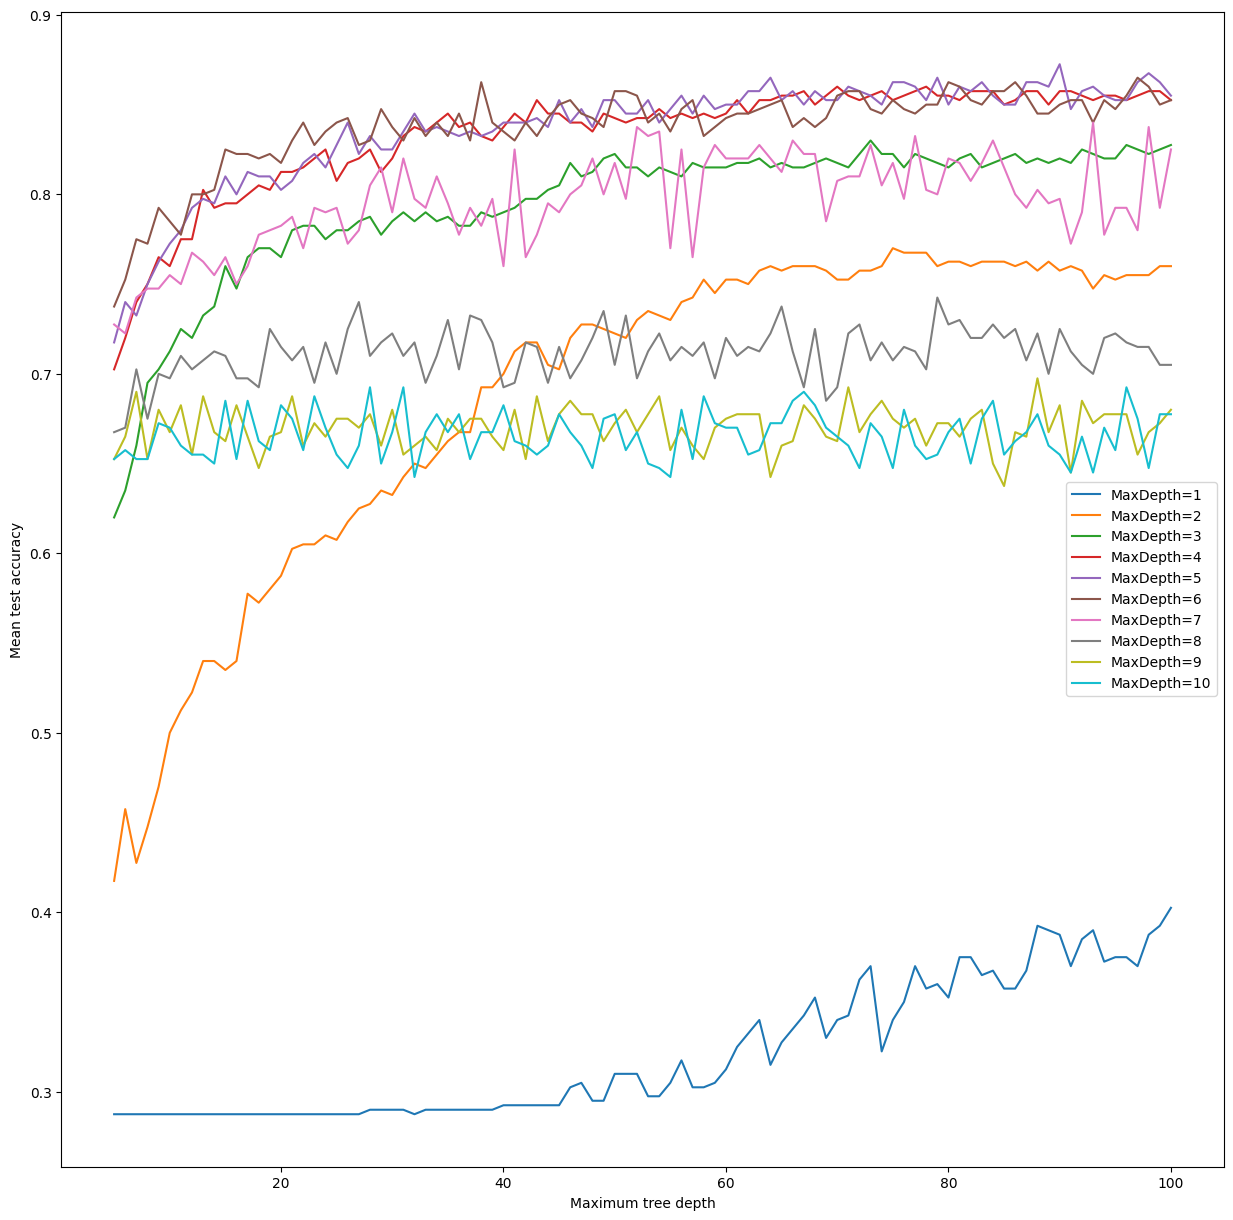

In [11]:
fig, ax = plt.subplots(figsize=(15,15))

ax.plot(n_estimators, test_acc)
ax.set_xlabel('Maximum tree depth')
ax.set_ylabel('Mean test accuracy')
ax.legend(['MaxDepth=1','MaxDepth=2','MaxDepth=3','MaxDepth=4','MaxDepth=5','MaxDepth=6','MaxDepth=7','MaxDepth=8','MaxDepth=9','MaxDepth=10'])